# Common Patterns

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Function to plot the series graph

In [8]:
def plotTimeSeries(time, series, format="-", start=0, end=None, label=None):
  plt.plot(time[start:end],series[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

## Trend

In [9]:
def trend(time, slope=0):
  return slope*time

creating a time series that trends upward

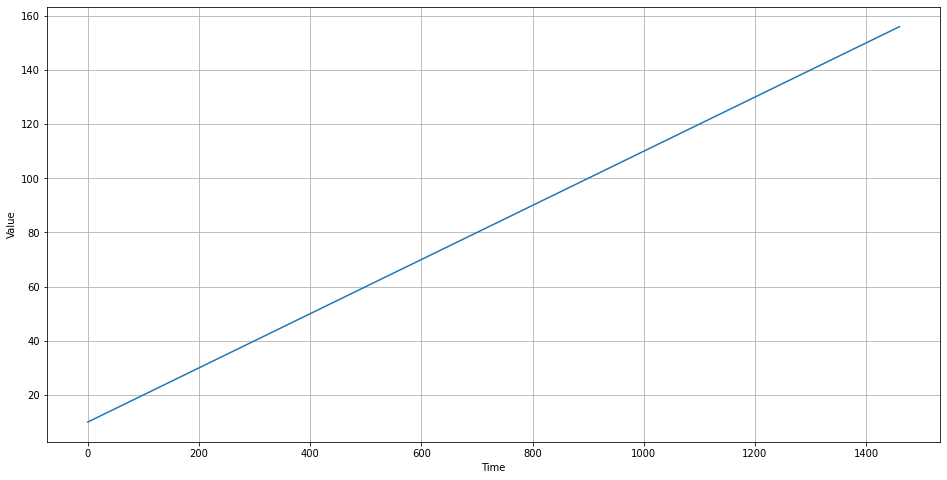

In [10]:
time = np.arange(4*365 + 1)
baseline =10 
series = baseline +trend(time,0.1)

plt.figure(figsize=(16,8 ))
plotTimeSeries(time,series)
plt.show()

In [11]:
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [12]:
series

array([ 10. ,  10.1,  10.2, ..., 155.8, 155.9, 156. ])

## Seasonality Pattern


In [13]:
def seasonalPattern(seasonal):
  return np.where(seasonal < 0.4,
                  np.cos(seasonal*2*np.pi),
                  1/np.exp(3*seasonal))
  
def seasonality(time, period, amplitude=1, phase=0):
  seasonal = ((time+phase)%period) / period
  return amplitude * seasonalPattern(seasonal)

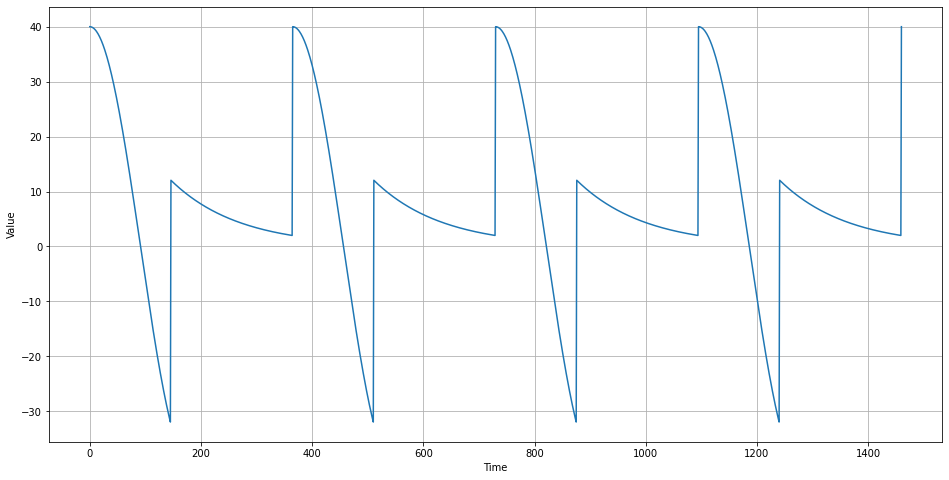

In [14]:
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(16,8))
plotTimeSeries(time, series)
plt.show()

## Time series with both trend + seasonality

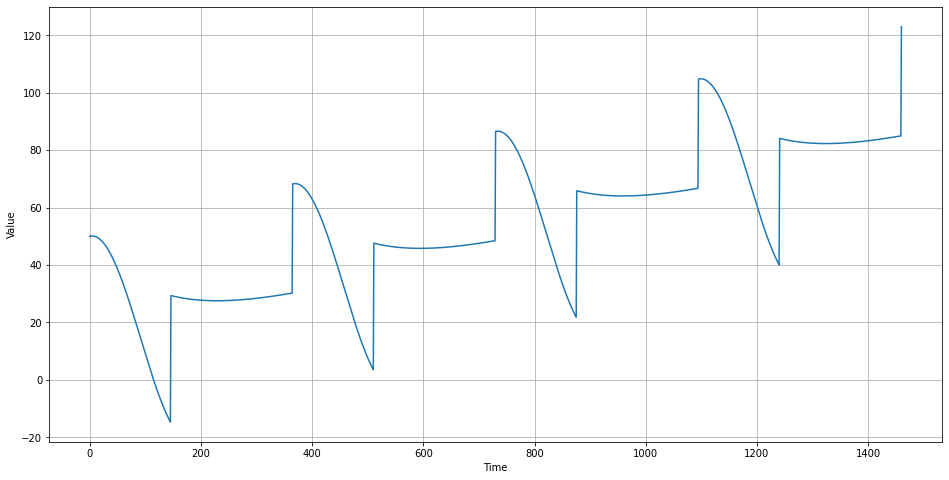

In [15]:
slope = 0.05
series= baseline +trend(time,slope)+ seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(16,8))
plotTimeSeries(time, series)
plt.show()

## Adding Noise

In [16]:
def whiteNoise(time, noise_level=1, seed=None):
  rand = np.random.RandomState(seed)
  return rand.randn(len(time))*noise_level

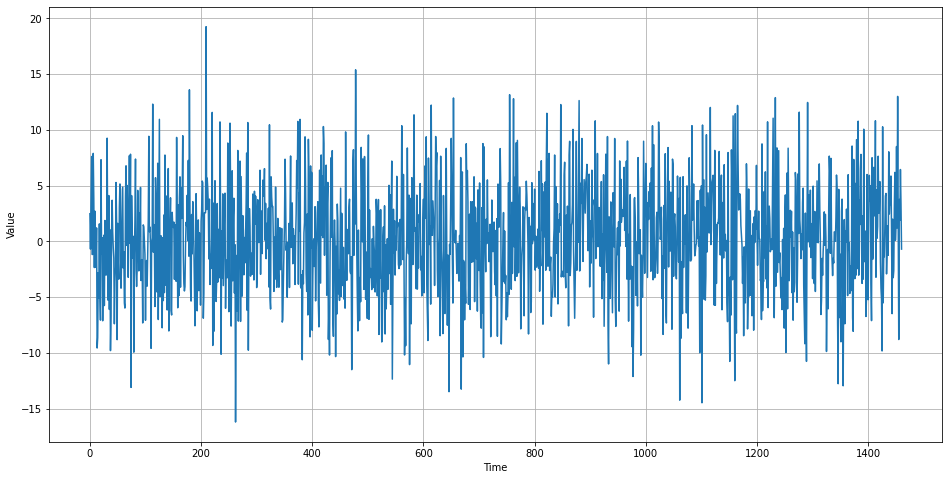

In [17]:
noise_level = 5
noise = whiteNoise(time,noise_level, seed=42)

plt.figure(figsize=(16,8))
plotTimeSeries(time, noise)
plt.show()

## Trend + Seasonality + Noise

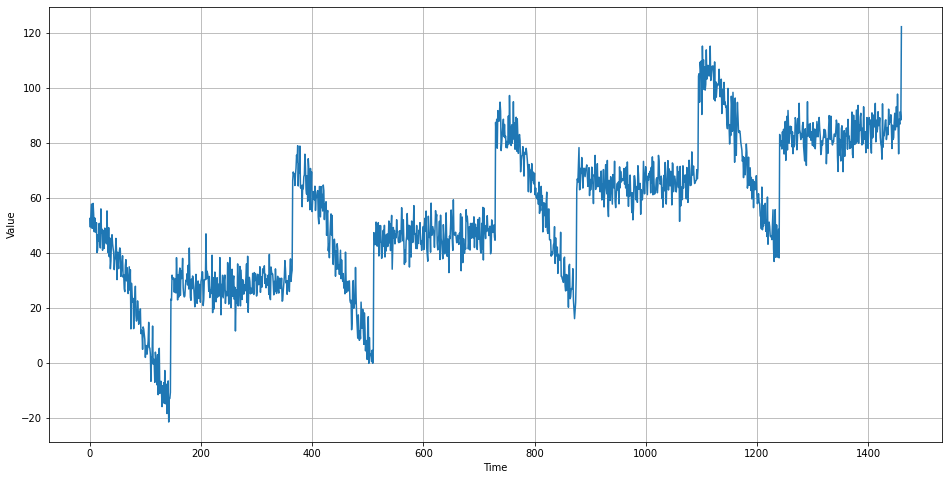

In [18]:
series += noise
plt.figure(figsize=(16,8))
plotTimeSeries(time,series)
plt.show()